import bibrary

In [127]:
from github import Github
import pandas as pd
import os
import matplotlib.pyplot as plt
from collections import Counter

Link to GitHub

In [128]:
g = Github("")

lấy thông tin repo

In [129]:
repo_owner = 'electron'
repo_name = 'electron'
repo = g.get_repo("electron/electron")

Lấy danh sách commit

In [130]:
commits = repo.get_commits()

tạo list lưu trữ thông tin về commits

In [131]:
commit_data = []

Thu thập thông tin cần thiết từ mỗi commit

In [132]:
for commit in commits:
    commit_info = {
        "sha": commit.sha,
        "author": commit.commit.author.name if commit.commit.author.name else 'Unknown',
        "author_date": str(commit.commit.author.date),  # Để tách date và time từ chuỗi
        "committer": commit.commit.committer.name if commit.commit.committer.name else 'Unknown',
        "committer_date": commit.commit.committer.date,
        "message": commit.commit.message,
        #"files": [file.filename for file in commit.files]  # danh sách file đã được chỉnh sửa
    }
    commit_data.append(commit_info)

Chuyển đổi danh sách thành DataFrame

In [133]:
df = pd.DataFrame(commit_data)
df.to_csv("commit_data.csv", index = False)

# Lưu dữ liệu thô

Làm sạch dữ liệu

In [135]:
#kiểm tra thông tin thiếu 
print(df.isnull().sum())

sha               0
author            0
author_date       0
committer         0
committer_date    0
message           0
dtype: int64


In [136]:
# xử lý dữ liệu thiếu (nếu có) 
df = df.dropna()

In [137]:
# kiểm tra lại truóc khi làm sạch 
print(df.isnull().sum)

<bound method DataFrame.sum of          sha  author  author_date  committer  committer_date  message
0      False   False        False      False           False    False
1      False   False        False      False           False    False
2      False   False        False      False           False    False
3      False   False        False      False           False    False
4      False   False        False      False           False    False
...      ...     ...          ...        ...             ...      ...
28262  False   False        False      False           False    False
28263  False   False        False      False           False    False
28264  False   False        False      False           False    False
28265  False   False        False      False           False    False
28266  False   False        False      False           False    False

[28267 rows x 6 columns]>


Tiền xử lý dữ liệu

In [138]:
# Chuyển đổi cột 'author_date' và 'committer_date' thành định dạng datetime
df['author_date'] = pd.to_datetime(df['author_date'])
df['committer_date'] = pd.to_datetime(df['committer_date'])

In [139]:
# kiểm tra kiểu dữ liệu
print(df.dtypes)

sha                            object
author                         object
author_date       datetime64[ns, UTC]
committer                      object
committer_date    datetime64[ns, UTC]
message                        object
dtype: object


In [140]:
#tổ chức lại dữ liệu 
df['year'] = df['author_date'].dt.year
df['month'] = df['author_date'].dt.month

In [141]:
# lưu lại DataFrame sau khi tiền xử lý
df.to_csv("commit_data.csv", index = False)
print(df.head())

                                        sha             author  \
0  6bf83b389bd752ae6e357cada84ed89e7beac0ba       Shelley Vohr   
1  2c985366c8bb22fd15e6ad4a596c3a1060f6af08      Samuel Attard   
2  429d50bb1850ad34b86f02f7641fb889c1320bae     Keeley Hammond   
3  5b98be3ccbe09579e1d088c31420c6a79215ce94     Keeley Hammond   
4  5397560ab307aeb9f2c0f03ff711229384a410ec  John Kleinschmidt   

                author_date committer            committer_date  \
0 2024-06-14 20:29:11+00:00    GitHub 2024-06-14 20:29:11+00:00   
1 2024-06-14 18:47:58+00:00    GitHub 2024-06-14 18:47:58+00:00   
2 2024-06-14 16:14:38+00:00    GitHub 2024-06-14 16:14:38+00:00   
3 2024-06-14 16:08:41+00:00    GitHub 2024-06-14 16:08:41+00:00   
4 2024-06-14 16:08:21+00:00    GitHub 2024-06-14 16:08:21+00:00   

                                             message  year  month  
0  build: add GN check step (#42508)\n\n* build: ...  2024      6  
1  build: fix dubious ownership error in version ...  2024      

4.Phân tích dữ liệu 

Số lượng commit theo tháng trong năm 

In [142]:
# Phân tích số lượng commits theo tháng trong năm
commits_per_month = df.groupby('month').size()
print(commits_per_month)

month
1     2084
2     1880
3     2383
4     2494
5     2834
6     2567
7     2468
8     2500
9     2339
10    2597
11    2362
12    1759
dtype: int64


### Người đóng góp nhiều nhất

In [143]:
# Phân tích tần suất commits của các tác giả
commits_per_author = df['author'].value_counts()
print(commits_per_author.head(10))

author
Cheng Zhao           8544
Kevin Sawicki        2998
Shelley Vohr         1553
Samuel Attard        1367
Electron Bot          959
Jeremy Apthorp        758
Milan Burda           716
deepak1556            648
Zeke Sikelianos       592
John Kleinschmidt     582
Name: count, dtype: int64


### Phân tích lượng commits theo năm

In [144]:
commits_per_year = df.groupby('year').size()
print(commits_per_year)

year
2013    1320
2014    2111
2015    4515
2016    5975
2017    4239
2018    2730
2019    2056
2020    1546
2021    1361
2022    1107
2023     923
2024     384
dtype: int64


### Sự tăng trưởng của số lượng commits và số lượng người đóng góp 

In [145]:
commits_growth = df.groupby(['year', 'month']).size()
print(commits_growth)

year  month
2013  3         36
      4        116
      5        162
      6         81
      7        147
              ... 
2024  2         58
      3         59
      4         51
      5         66
      6         73
Length: 136, dtype: int64


### Biểu đổ số lượng commit theo tháng trong năm

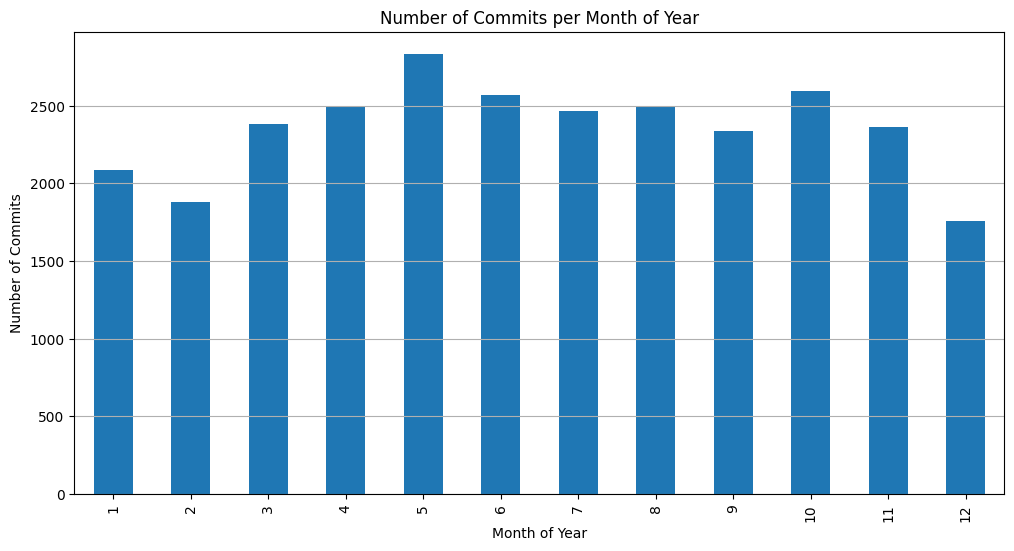

In [146]:
import matplotlib.pyplot as plt

df['month'] = pd.Categorical(df['month'], categories=['Tháng 1', 'Tháng 2', 'Tháng 3', 'Tháng 4', 'Tháng 5', 'Tháng 6', 'Tháng 7', 'Tháng 8', 'Tháng 9', 'Tháng 10', 'Tháng 11', 'Tháng 12'], ordered=True)

commit_counts = df['month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
commits_per_month.plot(kind='bar')
plt.title('Number of Commits per Month of Year')
plt.xlabel('Month of Year')
plt.ylabel('Number of Commits')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

### Nguời đóng góp nhiều nhất (Top 10)

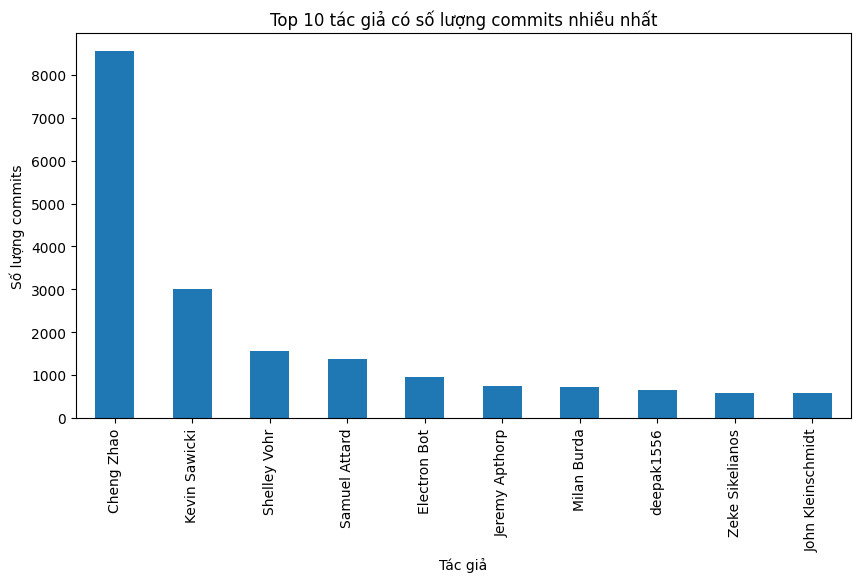

In [151]:
    plt.figure(figsize=(10, 5))
    commits_per_author.head(10).plot(kind='bar')
    plt.title('Top 10 tác giả có số lượng commits nhiều nhất trong năm 2023')
    plt.xlabel('Tác giả')
    plt.ylabel('Số lượng commits')
    plt.show()


### Sự tăng trưởng của số lượng commits theo năm

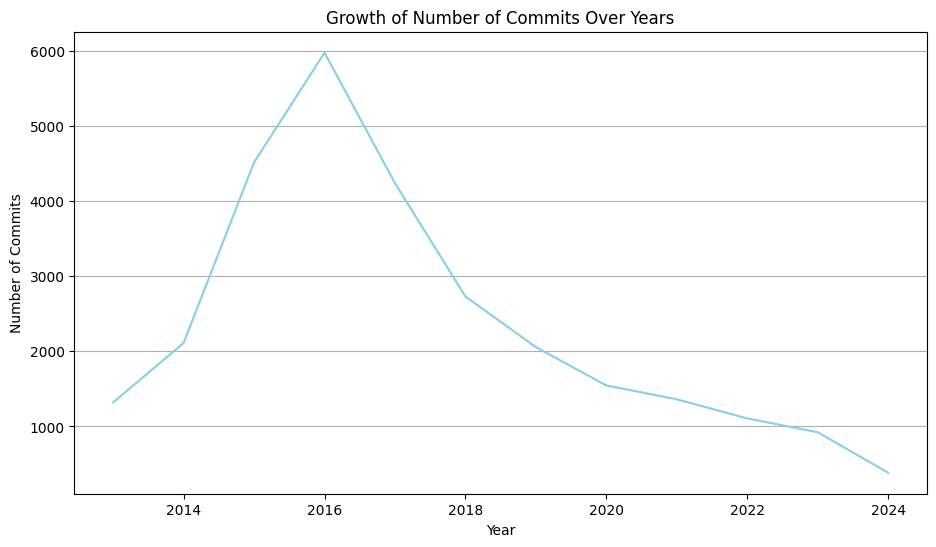

In [153]:
plt.figure(figsize=(10, 6))
commits_per_year.plot(kind = 'line', color = 'skyblue')
plt.title('Growth of Number of Commits Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Commits')
plt.grid(axis='y')
plt.show()


### Sự tăng trưởng của số lượng contributors theo năm 

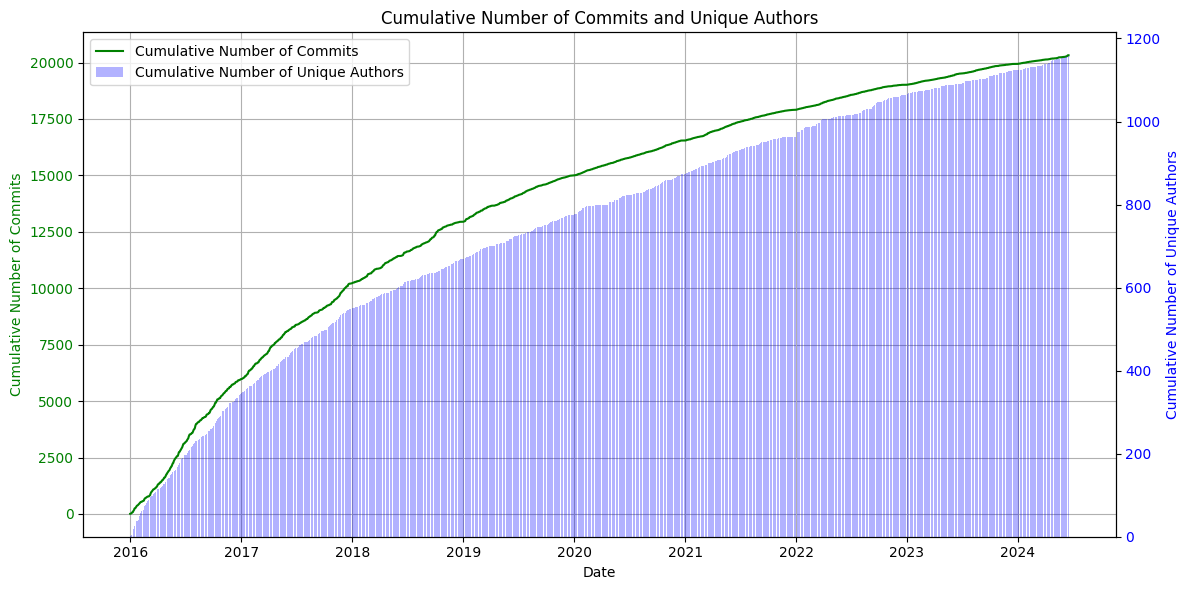

In [158]:
df = df[df['author_date'].dt.year >= 2013]
commit_counts = df.groupby(df['author_date'].dt.date).size().cumsum()
df_unique_authors = df.drop_duplicates(subset=['author'])
unique_author_counts = df_unique_authors.groupby(df_unique_authors['author_date'].dt.date)['author'].nunique().cumsum()
date_range = pd.date_range(start=commit_counts.index.min(), end=pd.Timestamp.today(), freq='D')
commit_counts = commit_counts.reindex(date_range, method='ffill').fillna(0)
unique_author_counts = unique_author_counts.reindex(date_range, method='ffill').fillna(0)
fig, ax1 = plt.subplots(figsize=(12, 6))
line1, = ax1.plot(commit_counts.index, commit_counts.values, color='green', label='Cumulative Number of Commits')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Number of Commits', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.grid(True)
ax2 = ax1.twinx()
bars = ax2.bar(unique_author_counts.index, unique_author_counts.values, color='blue', alpha=0.3, label='Cumulative Number of Unique Authors')
ax2.set_ylabel('Cumulative Number of Unique Authors', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
plt.title('Cumulative Number of Commits and Unique Authors')

lines = [line1] + [bars]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')

fig.tight_layout()
plt.show()